# <center>Régression linéaire simple</center>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
df_smp = pd.read_csv("./reg_simple.csv")

In [3]:
x_smp = np.array(df_smp["heure_rev"])
x_smp = x_smp.reshape(27, 1)
X_smp = np.hstack((x_smp, np.ones(x_smp.shape)))

Y_smp = np.array(df_smp["note"])
Y_smp = Y_smp.reshape(27, 1)

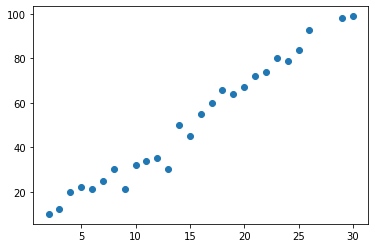

In [4]:
plt.scatter(x_smp, Y_smp)

In [5]:
theta_smp = np.random.randn(2, 1)
theta_smp

array([[ 0.7127034 ],
       [-0.98212065]])

## Modèle linéaire

In [6]:
def model(X, theta):
    return X.dot(theta)

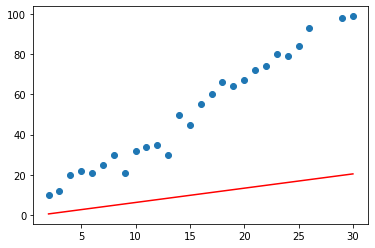

In [7]:
plt.scatter(x_smp, Y_smp)
plt.plot(x_smp, model(X_smp, theta_smp), c='red')

## Fonction Coût : Erreur Quadratique moyenne

In [8]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [9]:
cost_function(X_smp, Y_smp, theta_smp)

1082.7835438221582

## Gradients et Descente de gradient

In [10]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [11]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

## Phase d'entraînement

In [12]:
theta_smp_final, cost_history_smp = gradient_descent(X_smp, Y_smp, theta_smp, 0.001, 25)
theta_smp_final

array([[ 3.40561598],
       [-0.83633061]])

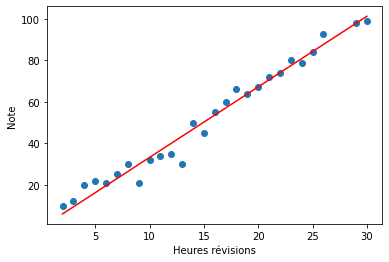

In [13]:
pred_smp = model(X_smp, theta_smp_final)
plt.scatter(x_smp, Y_smp)
plt.plot(x_smp, pred_smp, c="red")
plt.xlabel('Heures révisions')
plt.ylabel('Note')
plt.show()

## Courbe de la fonction coût selon les itérations

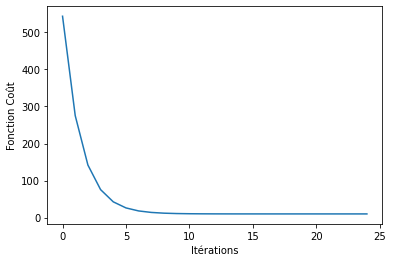

In [14]:
plt.plot(range(25), cost_history_smp)
plt.xlabel('Itérations')
plt.ylabel('Fonction Coût')
plt.show()

## Evaluation finale

In [15]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [16]:
coef_determination(Y_smp, pred_smp)

0.9728433647624698

## Avec Sklearn

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [39]:
# df_smp = pd.read_csv("./reg_simple.csv")

In [20]:
x = df_smp.iloc[:, 0].values.reshape(-1, 1)
y = df_smp.iloc[:, 1].values.reshape(-1, 1)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(18, 1) (9, 1)
(18, 1) (9, 1)


In [34]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
model.coef_

array([[3.32358429]])

In [35]:
y_pred = model.predict(x_test)

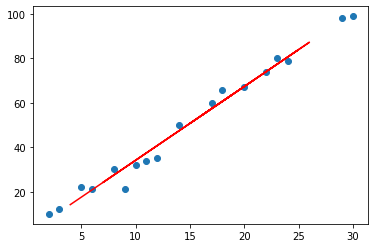

In [36]:
plt.scatter(x_train, y_train)
plt.plot(x_test, y_pred, color="red")
plt.show()

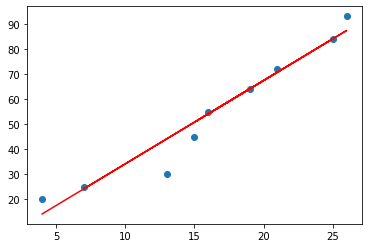

In [37]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color="red")
plt.show()

In [38]:
mean_squared_error(y_test, y_pred)

33.469256910638016